In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
#import missingno as msnum

In [2]:
pd.set_option("display.max_columns", 200)
pd.set_option("display.max_row", 160)
pd.set_option('max_colwidth', 200)

In [176]:
rejected = pd.read_csv('../Data/rejected.csv')

In [177]:
rejected.head(2)

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0


In [178]:
rejected['Loan Title'].value_counts()

Debt consolidation                         6418016
debt_consolidation                         5895211
Other                                      2656222
Credit card refinancing                    2298199
other                                      2042528
                                            ...   
Help me get out of this mess                     1
help with wedding expens                         1
investing education for mobile dynamics          1
HSBC refinance loan                              1
Business Advertising Loan                        1
Name: Loan Title, Length: 73928, dtype: int64

In [183]:
rejected['Loan Title'] = rejected['Loan Title'].replace({'debt_consolidation':'Debt consolidation',
                                                         'Debt consolidation':'Debt Consolidation',
                                                         'credit_card':'Credit card refinancing',
                                                         'Credit card refinancing':'Credit Card Refinancing',
                                                         'other':'Other',
                                                         'car':'Car financing',
                                                         'Car financing':'Car Financing',
                                                         'home_improvement':'Home improvement',
                                                         'Home improvement':'Home Improvement',
                                                         'major_purchase':'Major purchase',
                                                         'Major purchase':'Major Purchase',
                                                         'moving':'Moving',
                                                         'medical':'Medical expenses',
                                                         'Medical expenses':'Medical Expenses',
                                                         'Home buying':'Home Purchase',
                                                         'small_business':'Business Loan',
                                                         'Business':'Business Loan',
                                                         'Moving':'Moving And relocation',
                                                         'Moving and relocation': 'Moving And Relocation',
                                                         'house':'Home Purchase',
                                                         'vacation':'Vacation',
                                                         'Business Line Of Credit':'Business Loan',
                                                         'debt consolidation':'Debt Consolidation',
                                                         ' ':'Other',
                                                         'renewable_energy':'Green loan',
                                                         'Green loan':'Green Loan',
                                                         'Consolidation':'Debt Consolidation',
                                                         'Debt Consolidation Loan':'Debt Consolidation',
                                                         'personal':'Personal Loan',
                                                         'Personal':'Personal Loan',
                                                         'educational':'Education',
                                                         'wedding':'Wedding',
                                                         'personal loan':'Personal Loan',
                                                         'consolidation':'Debt Consolidation',
                                                         'Education':'Student Loan',
                                                         'Small Business Loan':'Business Loan',
                                                         'home improvement':'Home Improvement',
                                                         'Credit Card Consolidation':'Credit Card Refinancing',
                                                         'Loan':'Other',
                                                         'Consolidate':'Debt Consolidation',
                                                         'Consolidation Loan':'Debt Consolidation',
                                                         'Credit Card Refinance':'Credit Card Refinancing',
                                                         'student loan':'Student Loan',
                                                         'Debt':'Other',
                                                         'consolidate':'Debt Consolidation',
                                                         'Credit Card Loan':'Credit Card Refinancing',
                                                         'loan':'Other',
                                                         'Car Loan':'Car Financing',
                                                         'Credit Card Payoff':'Credit Card Refinancing',
                                                         'Personal loan':'Personal Loan',
                                                         'School':'Student Loan', 
                                                         'debt':'Other',
                                                         'business':'Business Loan',
                                                         'Home Improvement Loan':'Home Improvement', 
                                                         'School Loan':'Student Loan',
                                                         'credit card refinance':'Credit Card Refinancing',
                                                         'payoff':'Other',
                                                         'My Loan':'Personal Loan',
                                                         'my loan':'Personal Loan',
                                                         'Credit Card':'Credit Card Refinancing',
                                                         'credit card':'Credit Card Refinancing',
                                                         'credit cards':'Credit Card Refinancing',
                                                         'credit card payoff':'Credit Card Refinancing',
                                                         'DEBT CONSOLIDATION':'Debt Consolidation',
                                                         'Medical':'Medical Expenses',
                                                         'home':'Home Improvement',
                                                         'Credit Cards':'Credit Card Refinancing',
                                                         'school':'Student Loan',
                                                         'Credit Card Financing':'Credit Card Refinancing',
                                                         'credit card consolidation':'Credit Card Refinancing',
                                                         'consolidation loan':'Debt Consolidation',
                                                         'pay off credit cards':'Credit Card Refinancing',
                                                         'business loan': 'Business Loan', 
                                                         'Payoff':'Other',
                                                         'debt consolidation loan':'Debt Consolidation',
                                                         'Debt Consolidation ':'Debt Consolidation',
                                                         'bills':'Other',
                                                         'Home':'Home Improvement',
                                                         'Small Business':'Business Loan',
                                                         'Consolidate debt':'Debt Consolidation',
                                                         'Consolidate Debt':'Debt Consolidation',
                                                         'Refinance':'Other',
                                                         'Bills':'Other',
                                                         'freedom':'Freedom',
                                                         'school loan':'Student Loan',
                                                         'Wedding Loan':'Wedding',
                                                         'Debt Free':'Other',
                                                         'car loan':'Car Financing',
                                                         'Other Loan':'Other',
                                                         'Debt Loan':'Other',
                                                         'Debt consolidation loan':'Debt Consolidation',
                                                         'Education Loan':'Student Loan',
                                                         'education':'Student Loan',
                                                         'Major Purchase Loan':'Major Purchase',
                                                         'Credit card consolidation':'Credit Card Refinancing',
                                                         'Pay off credit cards':'Credit Card Refinancing',
                                                         'Car':'Car Financing',
                                                         'Auto Loan':'Car Financing',
                                                         'Credit Card Debt':'Credit Card Refinancing',
                                                         'major purchase':'Major Purchase',
                                                         'Motorcycle':'Motorcycle Loan',
                                                         'Debt consolidation':'Debt Consolidation',
                                                         'consolidate debt':'Debt Consolidation',
                                                         'Student Loan ':'Student Loan',
                                                         'Student loan':'Student Loan',
                                                         'My loan':'Personal Loan'})

In [184]:
rejected['Loan Title'].value_counts(dropna=False).nlargest(20)

Debt Consolidation         12328785
Other                       4717292
Credit Card Refinancing     3666077
Car Financing               1289981
Home Improvement            1191501
Major Purchase               957489
Business Loan                860772
Medical Expenses             748155
Moving And Relocation        701004
Home Purchase                678013
Vacation                     309189
Green Loan                    56811
Wedding                       18494
Personal Loan                  6164
Student Loan                   5304
NaN                            1303
Freedom                         492
Motorcycle Loan                 300
Debt consolidation              148
Credit Consolidation            140
Name: Loan Title, dtype: int64

In [173]:
rejected = rejected.rename(columns={'Loan Title':'Loan Type'})

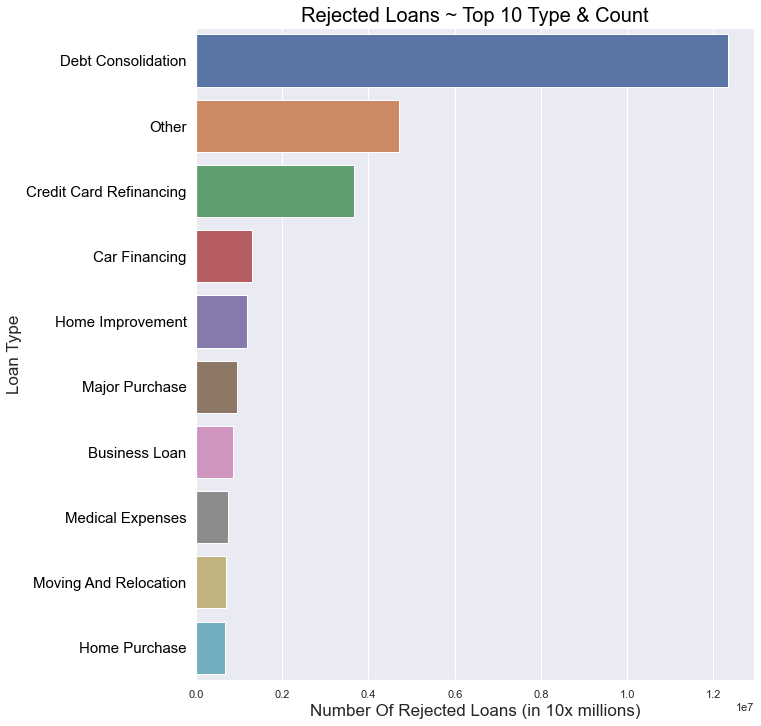

In [174]:
plt.figure(figsize=(10,12))

sns.countplot(data=rejected, y='Loan Type', 
              order=rejected['Loan Type'].value_counts().iloc[:10].index)


plt.title('Rejected Loans ~ Top 10 Type & Count', size=20, color='black')
plt.xlabel('Number Of Rejected Loans (in 10x millions)', size=17)
plt.ylabel('Loan Type', size=17)
plt.yticks(size=15, color='black');
